$y_{t} = \sum \limits _{k=1}^d A_k y_{t-k} + \epsilon_{t}$

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Data/EU/full_data.csv')

In [2]:
df_us = pd.read_csv('Data/EU/us_daily_data.csv')

In [3]:
df.dropna()

,date,y2 yield,y5 yield,y10 yield,inflation_rate,unemployment_rate,gdp_growth_rate,debt_rate_to_GDP,GAX_index,GAX_volume,eur_usd
0,Jan 03 2000,4.380,5.1399,5.1399,1.9,9.36481,4.2,71.452,6750.759766,43072500.0,1.0265
1,Jan 04 2000,4.380,5.1399,5.1399,1.9,9.36481,4.2,71.452,6586.950195,46678400.0,1.0312
2,Jan 05 2000,4.380,5.1399,5.1399,1.9,9.36481,4.2,71.452,6502.069824,52682800.0,1.0316
3,Jan 06 2000,4.380,5.1399,5.1399,1.9,9.36481,4.2,71.452,6474.919922,41180600.0,1.0324
4,Jan 07 2000,4.380,5.1399,5.1399,1.9,9.36481,4.2,71.452,6780.959961,56058900.0,1.0292
...,...,...,...,...,...,...,...,...,...,...,...
5408,Sep 24 2020,-0.496,-0.2653,-0.2653,-0.3,8.62473,-4.2,97.319,12606.570313,61272100.0,1.1672
5409,Sep 25 2020,-0.496,-0.2653,-0.2653,-0.3,8.62473,-4.2,97.319,12469.200195,66129900.0,1.1630
5410,Sep 28 2020,-0.496,-0.2653,-0.2653,-0.3,8.62473,-4.2,97.319,12870.870117,72431000.0,1.1664
5411,Sep 29 2020,-0.496,-0.2653,-0.2653,-0.3,8.62473,-4.2,97.319,12825.820313,49842200.0,1.1742


In [4]:
month_dict = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',"Jul":'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}

In [5]:
df['date'] = df['date'].apply(lambda x: x.split(' ')[2]+"-"+month_dict[x.split(' ')[0]]+'-'+x.split(' ')[1])

In [6]:
df = pd.merge(df,df_us, how='inner',on='date',suffixes=('_eu', '_us')).dropna().drop('eur_usd_eu',axis=1)

y2 yield
y5 yield_eu
y10 yield_eu
inflation_rate
unemployment_rate
gdp_growth_rate
debt_rate_to_GDP
GAX_index
GAX_volume
m3 yield
m6 yield
y1 yield
y5 yield_us
y5 inflation indexed
y10 yield_us
y10 inflation indexed
m3 secondary
m6 secondary
spy


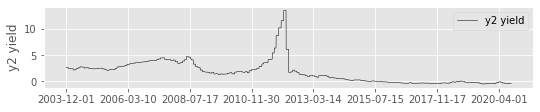

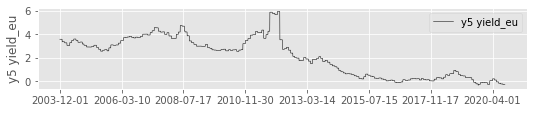

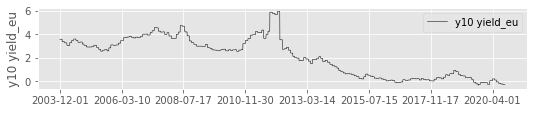

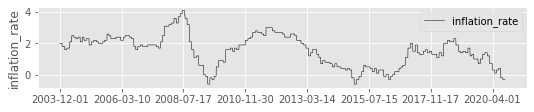

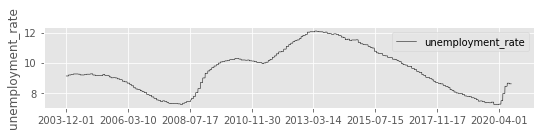

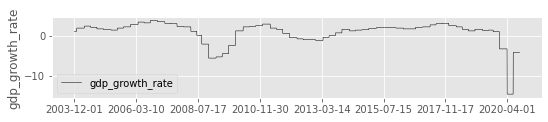

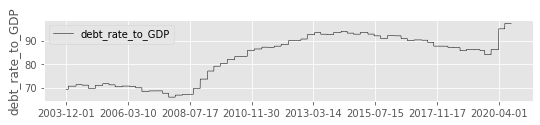

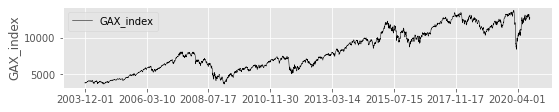

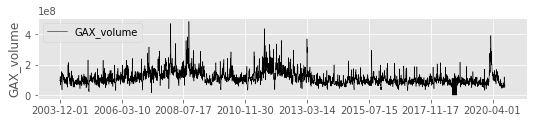

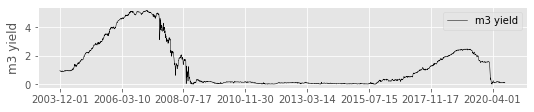

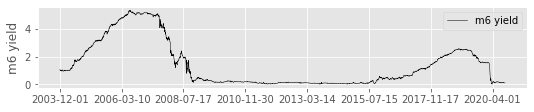

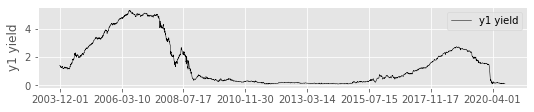

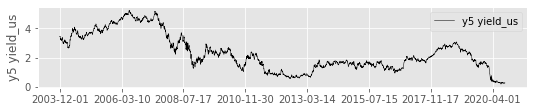

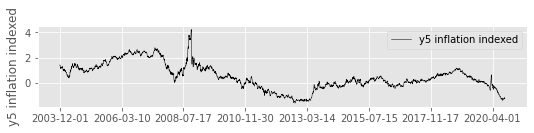

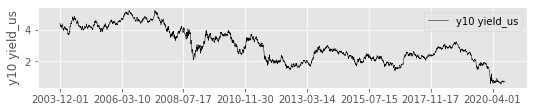

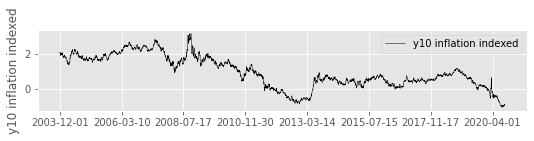

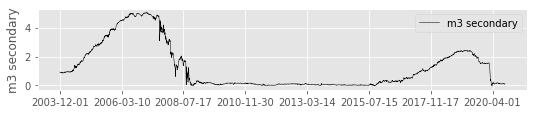

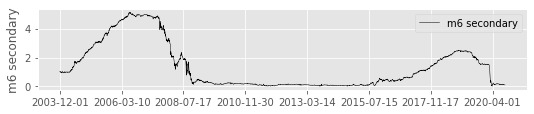

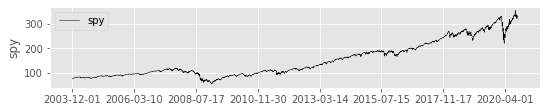

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
for i in df.columns.values[1:-1]:
    print(i)
    fig = plt.figure(figsize = (8, 1.5))
    ax = fig.add_axes([0.10, 0.22, 0.85, 0.75])
    plt.plot(df['date'].values.tolist(),df[i].values, color = "black", linewidth = 0.5, label=i)
    plt.ylabel(i)
#     plt.xlabel("Date")
    plt.xticks(range(0,df.shape[0],500))
    plt.legend()
#     if i=="GAX_index":
    plt.savefig(f"{i}.png")
#     plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['eur_usd_us'].values)
print("ADF Statistics", result[0])
print("P value", result[1])

ADF Statistics -2.107101646631103
P value 0.24166859908917754


For a Time series to be stationary, its ADCF test should have:

1. p-value to be low (according to the null hypothesis)

2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics From the above ADCF test result, we see that p-value(at max can be.0) is very negligible. Also critical values are very close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is stationary

In [9]:

for i in df.columns.values[1:]:
    print(f'Results of Dickey Fuller Test on variable {i}:')
    dftest = adfuller(df[i], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    print("***************************************************")

Results of Dickey Fuller Test on variable y2 yield:
Test Statistic                   -3.154105
p-value                           0.022800
#Lags Used                       21.000000
Number of Observations Used    3579.000000
Critical Value (1%)              -3.432178
Critical Value (5%)              -2.862348
Critical Value (10%)             -2.567200
dtype: float64
***************************************************
Results of Dickey Fuller Test on variable y5 yield_eu:
Test Statistic                   -1.122021
p-value                           0.706211
#Lags Used                       21.000000
Number of Observations Used    3579.000000
Critical Value (1%)              -3.432178
Critical Value (5%)              -2.862348
Critical Value (10%)             -2.567200
dtype: float64
***************************************************
Results of Dickey Fuller Test on variable y10 yield_eu:
Test Statistic                   -1.122021
p-value                           0.706211
#Lags Used     

In [10]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [11]:
for i in df.columns.values[1:]:
    print(f"Kpss test for {i}")
    kpss_test(df[i])
    print("************************************")

Kpss test for y2 yield
Results of KPSS Test:
Test Statistic            5.248544
p-value                   0.010000
Lags Used                30.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
************************************
Kpss test for y5 yield_eu
Results of KPSS Test:
Test Statistic            8.977737
p-value                   0.010000
Lags Used                30.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
************************************
Kpss test for y10 yield_eu
Results of KPSS Test:
Test Statistic            8.977737
p-value                   0.010000
Lags Used                30.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
****

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic 

In [12]:
# Why the p-value is always 0

In [13]:
## Differencing to be done
def seasonal_difference(n, columns):
    df_tempory = df.copy()
    for column in columns:
        df_tempory[column] = df_tempory[column] - df_tempory[column].shift(n)
    return df_tempory

def transform_difference(columns,shift=1):
    df_tempory = df.copy()
    for column in columns:
        df_tempory[column] = np.log(df_tempory[column])
        df_tempory[column] = df_tempory[column] - df_tempory[column].shift(shift)
    return df_tempory

In [14]:
def norm_cross_corr(set1, set2):
    return np.sum(set1 * set2) / (np.linalg.norm(set1) * np.linalg.norm(set2))

In [15]:

from sklearn import metrics
from scipy.stats import chi2_contingency
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
    mi = 0.5 * g / c_xy.sum()
    return mi

In [16]:
def cal_corr(target):
    MI_df = pd.DataFrame(columns=df.columns,index=['mutual_information','normed_cross_correlation'])
    for v in df.columns[1:].values.tolist():
        if v == target or v=='date':
            continue
        normed_cc = norm_cross_corr(df[v].values, df[target].values)
        mi = metrics.normalized_mutual_info_score(df[v].values, df[target].values)
        MI_df.loc['normed_cross_correlation',v] = normed_cc
        MI_df.loc['mutual_information', v] = mi
    return MI_df
#         print(f"The normed cross correlation betwenn {target} and {v} is {normed_cc}")
#         print(f"The mutual information betwenn {target} and {v} is {mi}")

In [17]:
corr_df = cal_corr("eur_usd_us")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clusteri

In [18]:
corr_df.to_csv('corr.csv')

In [19]:
variables = ['eur_usd_us','y10 yield_us','GAX_volume']

In [20]:
# # VARMA example
# from statsmodels.tsa.statespace.varmax import VARMAX
# from random import random
# # contrived dataset with dependency
# # fit model
# pred_steps = 100
# model = VARMAX(df[variables][:-pred_steps], order=(1,1))
# res = model.fit(maxiter=1000, disp=False)
# print(res.summary())

In [21]:
# ax = res.impulse_responses(100, orthogonalized=True).plot(figsize=(13,3))
# ax.set(xlabel='t', title='Responses to a shock to `dln_inv`');

In [47]:
df_diff = transform_difference(["GAX_index","y5 yield_eu","y2 yield","debt_rate_to_GDP","inflation_rate","unemployment_rate",'m3 yield', 'm6 yield', 'm3 secondary', 'm6 secondary', 'spy'],1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
df_diff.fillna(df_diff.mean(),inplace=True)

In [49]:
df_diff

,date,y2 yield,y5 yield_eu,y10 yield_eu,inflation_rate,unemployment_rate,gdp_growth_rate,debt_rate_to_GDP,GAX_index,GAX_volume,...,m6 yield,y1 yield,y5 yield_us,y5 inflation indexed,y10 yield_us,y10 inflation indexed,m3 secondary,m6 secondary,spy,eur_usd_us
0,2003-12-01,-0.002057,-0.001007,3.5888,NaN,-0.000016,1.1,0.000094,0.000335,95140000.0,...,-0.000629,1.41,3.46,1.42,4.40,2.08,NaN,-0.000624,0.000409,1.196501
1,2003-12-02,0.000000,0.000000,3.5888,0.0,0.000000,1.1,0.000000,-0.003130,92969400.0,...,-0.019048,1.38,3.43,1.38,4.38,2.05,-0.010811,-0.019418,-0.002512,1.208897
2,2003-12-03,0.000000,0.000000,3.5888,0.0,0.000000,1.1,0.000000,0.017281,116689400.0,...,0.000000,1.39,3.46,1.40,4.41,2.08,0.000000,0.000000,-0.001585,1.212298
3,2003-12-04,0.000000,0.000000,3.5888,0.0,0.000000,1.1,0.000000,-0.000227,122461400.0,...,0.000000,1.38,3.42,1.35,4.38,2.04,-0.010929,0.000000,0.004097,1.208094
4,2003-12-05,0.000000,0.000000,3.5888,0.0,0.000000,1.1,0.000000,-0.008566,92793500.0,...,-0.029270,1.30,3.23,1.20,4.23,1.92,-0.011050,-0.029853,-0.006995,1.218695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,2020-09-23,-0.002057,-0.001007,-0.2653,NaN,0.000000,-4.2,0.000000,0.003850,60244800.0,...,0.000000,0.13,0.28,-1.20,0.68,-0.92,0.095310,0.000000,-0.023464,1.165854
4388,2020-09-24,-0.002057,-0.001007,-0.2653,NaN,0.000000,-4.2,0.000000,-0.002883,61272100.0,...,0.000000,0.12,0.27,-1.18,0.67,-0.91,-0.095310,0.000000,0.002662,1.167324
4390,2020-09-28,-0.002057,-0.001007,-0.2653,NaN,0.000000,-4.2,0.000000,0.020748,72431000.0,...,0.000000,0.12,0.26,-1.22,0.67,-0.94,0.095310,0.000000,0.032511,1.167883
4391,2020-09-29,-0.002057,-0.001007,-0.2653,NaN,0.000000,-4.2,0.000000,-0.003506,49842200.0,...,0.000000,0.12,0.24,-1.25,0.66,-0.98,-0.200671,0.000000,-0.005461,1.174205


y2 yield


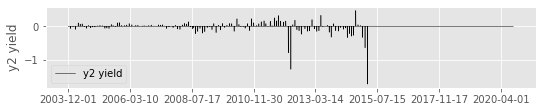

y5 yield_eu


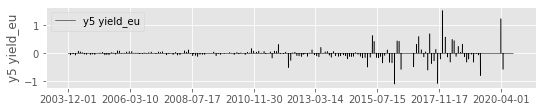

y10 yield_eu


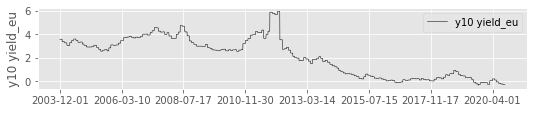

inflation_rate


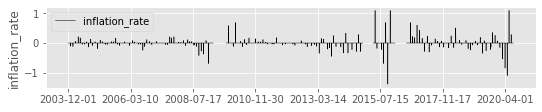

unemployment_rate


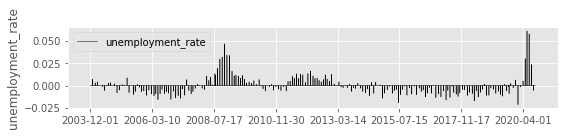

gdp_growth_rate


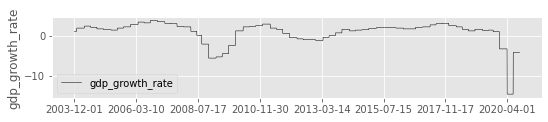

debt_rate_to_GDP


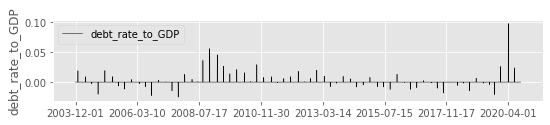

GAX_index


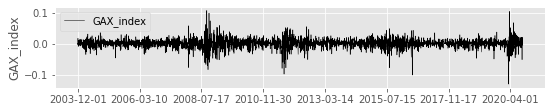

GAX_volume


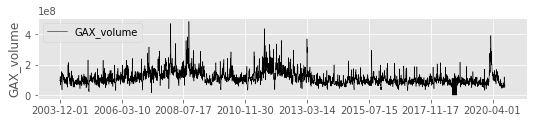

m3 yield


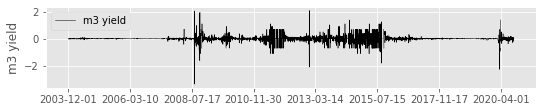

m6 yield


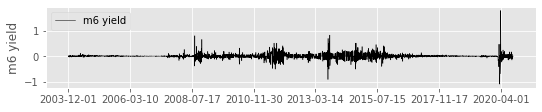

y1 yield


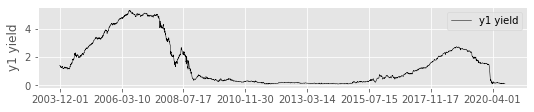

y5 yield_us


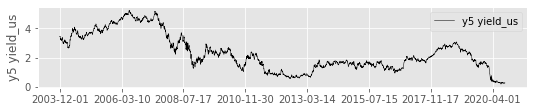

y5 inflation indexed


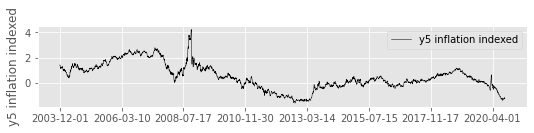

y10 yield_us


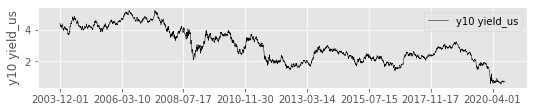

y10 inflation indexed


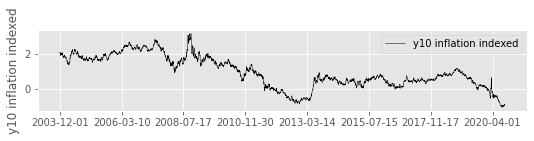

m3 secondary


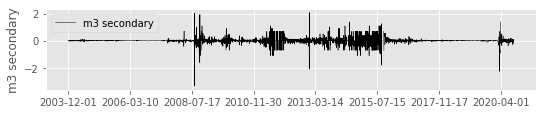

m6 secondary


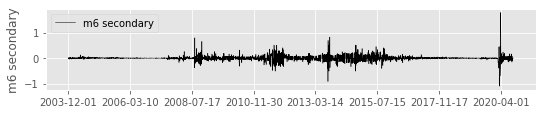

spy


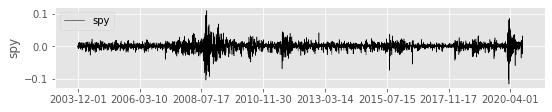

In [50]:
plt.style.use('ggplot')
for i in df_diff.columns.values[1:-1]:
    print(i)
    fig = plt.figure(figsize = (8, 1.5))
    ax = fig.add_axes([0.10, 0.22, 0.85, 0.75])
    plt.plot(df_diff['date'].values.tolist(),df_diff[i].values, color = "black", linewidth = 0.5, label=i)
    plt.ylabel(i)
#     plt.xlabel("Date")
    plt.xticks(range(0,df_diff.shape[0],500))
    plt.legend()
#     if i=="GAX_index":
#     plt.savefig(f"{i}.png")
    plt.show()

In [52]:
import numpy as np

def var_model(mat_Y, order_p, num_pred):
    """
    
    """
    
    N, T = mat_Y.shape
    time_lags = np.array(list(range(1, order_p + 1)))
    mat_Z = mat_Y[:, order_p :].T 
    mat_Q = np.zeros((T - order_p, N * order_p))
    for t in range(T - order_p):
        mat_Q[t, :] = mat_Y[:, t + order_p - time_lags].reshape([N * order_p])
    mat_A = np.matmul(np.matmul(np.linalg.inv(np.matmul(mat_Q.T, mat_Q)), mat_Q.T), mat_Z) 
    mat_Y_new = np.zeros((N, T + num_pred))
    mat_Y_new[:, : T] = mat_Y
    for t in range(num_pred):
        mat_Y_new[:, T+t] = np.matmul(mat_A.T, mat_Y_new[:, T + t - time_lags].reshape([N * order_p]))
    
    return mat_A, mat_Y_new[:, T :]

If we have $N$ dimension data with $T$ time steps and the AR order is $p$, we have $N*(Np)$ parameters for estimating. And one thing we should follow is that $Np\ll p$

In [53]:
def BIC(y, y_pred, k, p):
    n = y.shape[0]
    SSE = np.sum(np.square(y - y_pred))
    return n * np.log(SSE/n) + (k+p*k**2) * np.log(n)

def AIC(y, y_pred, k ,p):
    n = y.shape[0]
    SSE = np.sum(np.square(y - y_pred))
    return n * np.log(SSE/n) + 2 * (k+p*k**2)

def RMSE_(y, y_pred):
    return np.sqrt(np.square(np.subtract(y, y_pred)).mean())

In [54]:
import time
start = time.time()
def train(X, order_p=3, pred_steps=200, num_pred = 5):
    N, T = X.shape
    back_steps = T - pred_steps
    start_step = T - pred_steps
    mat_hat = np.zeros((N, pred_steps))
    for t in range(int(pred_steps / num_pred)):
        if t == 0:
            A, vec = var_model(X[:, 0 : t * num_pred + start_step], order_p, num_pred)
        else:
            A, vec = var_model(X[:, t * num_pred + start_step - back_steps 
                                 : t * num_pred + start_step], order_p, num_pred)
        if num_pred == 1:
            mat_hat[:, t] = vec.reshape(N)
        else:
            mat_hat[:, t * num_pred : (t + 1) * num_pred] = vec
        if (t + 1) % 40 == 0:
            print('The current prediction step is {}.'.format(t + 1))

    end = time.time()
    print('Running time: %d seconds'%(end - start))
    print(f"BIC: {BIC(X.T[-pred_steps:][:,0], mat_hat[0].T, order_p, X.shape[0])}")
    print(f"AIC: {AIC(X.T[-pred_steps:][:,0], mat_hat[0].T, order_p, X.shape[0])}")
    print(f"RMSE: {RMSE_(X.T[-pred_steps:][:,0], mat_hat[0].T)}")
    return mat_hat

In [55]:
## Results that use non stationary variables

In [66]:
# df = df_diff
order_p=1
pred_steps=100
num_pred=5
df = df_diff
variables = ['eur_usd_us','GAX_index', 'GAX_volume', "inflation_rate","unemployment_rate"]
# variables = df.columns.values.tolist()[1:-1]
for p in [1,2,3,4,5]:
    for num_pred in [1,3,5]:
        print(f"Order_p is {p}, num_pred is {num_pred}, the result is:")
        train(df[variables].values.T, order_p=p, pred_steps=pred_steps, num_pred=num_pred)

Order_p is 1, num_pred is 1, the result is:
The current prediction step is 40.
The current prediction step is 80.
Running time: 213 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 1, num_pred is 3, the result is:
Running time: 213 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 1, num_pred is 5, the result is:
Running time: 213 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 2, num_pred is 1, the result is:


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  


The current prediction step is 40.
The current prediction step is 80.
Running time: 214 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 2, num_pred is 3, the result is:
Running time: 215 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 2, num_pred is 5, the result is:
Running time: 215 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 3, num_pred is 1, the result is:
The current prediction step is 40.
The current prediction step is 80.
Running time: 216 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 3, num_pred is 3, the result is:
Running time: 217 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 3, num_pred is 5, the result is:
Running time: 217 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 4, num_pred is 1, the result is:
The current prediction step is 40.
The current prediction step is 80.
Running time: 218 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 4, num_pred is 3, the result is:
Running time: 219 seconds
BIC: nan
AIC: nan
RMSE: nan
Order_p is 4, num_pred is 5, the result is:
Runnin

In [37]:
# Results that use stationary variables

In [38]:
# variables = df.columns.values.tolist()[1:-1]
pred_steps = 100
mat_hat = train(df[variables].values.T,order_p=2, pred_steps=pred_steps, num_pred=1)

The current prediction step is 40.
The current prediction step is 80.
Running time: 207 seconds
BIC: -759.7959888243928
AIC: -900.4751788677497
RMSE: 0.006458385633593996


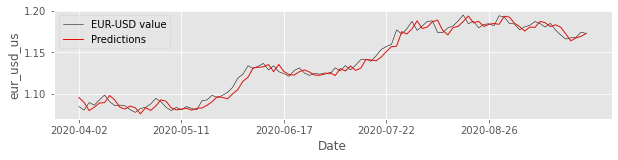

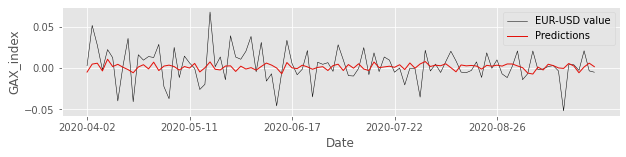

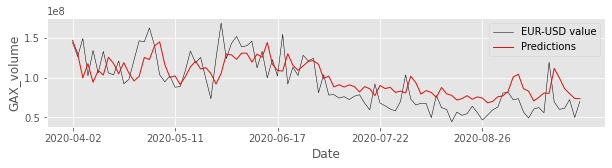

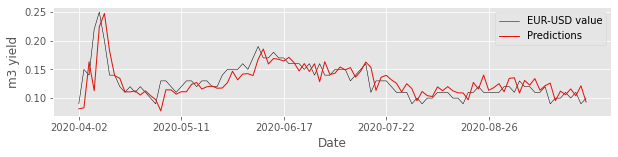

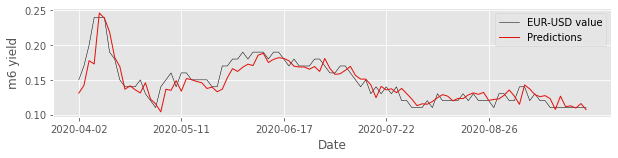

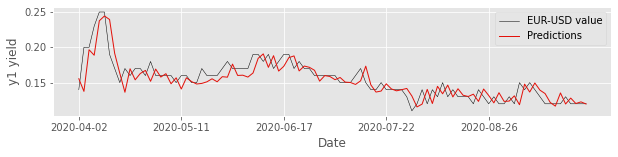

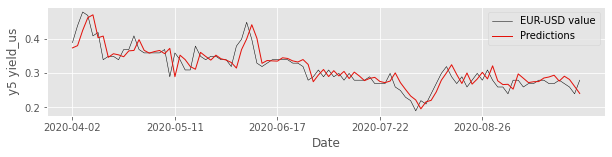

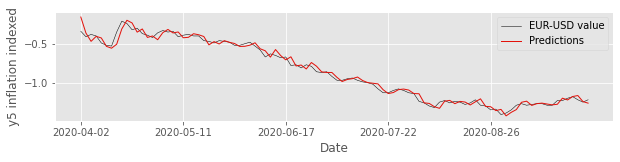

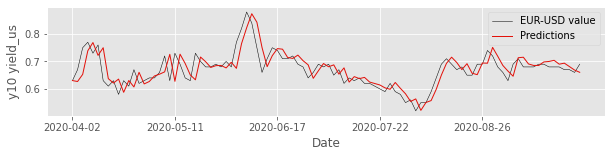

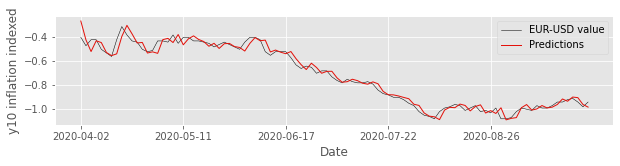

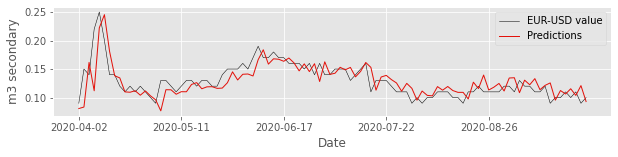

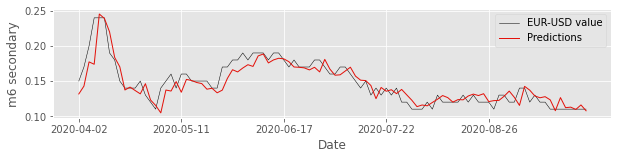

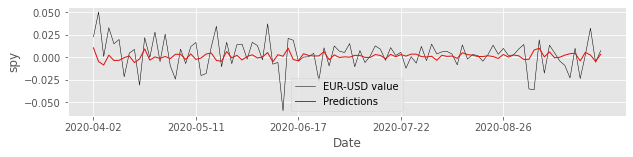

In [39]:
plt.style.use('seaborn-colorblind')
X = df[variables].values.T
T = X.shape[1]
for i,d in enumerate(variables):
    fig = plt.figure(figsize = (10, 2))
#     ax = fig.add_axes([0.13, 0.28, 0.85, 0.68])
    plt.plot(df['date'].values.tolist()[T - pred_steps: T],X[i,  T - pred_steps:], color = "black", linewidth = 0.5, label="EUR-USD value")
    plt.plot(df['date'].values.tolist()[T - pred_steps: T], mat_hat[i, :], color = "#e3120b", linewidth = 1.0, label="Predictions")
    plt.xlabel("Date")
    plt.xticks(range(0,100,20))
    plt.ylabel(d)
    plt.legend()
#     plt.show()
    if i==0:
        plt.savefig('eur_usd_all_variables.png')
#     ax.set_ylim([0, 65])

In [61]:
df['date'].values[0]

'2003-12-02'